In [2]:
import pandas as pd
import glob
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

periodos=[201901, 201902, 201903, 201904, 201905, 201906, 201907,201908, 201909, 201910, 201911, 201912,
          202001, 202002, 202003,202004, 202005, 202006, 202007] #Para iterar
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(path)
os.getcwd()#os.listdir()

'C:\\Users\\Asus\\Documents\\GitHub\\ANN_Itau'

In [3]:
df = pd.read_csv('Datos/raw/Transaccion_train.csv', index_col=0) #Hacer un acumulativo de montos o trANSSACCIONES
df.Periodo = df.Periodo.astype('object') #Lo pasamos a str
df.id = df.id.astype('object') #Lo pasamos a str
df.Signo = df.Signo.astype(str)
df['Fecha'] = pd.to_datetime(df.Fecha)

#-.-.-.-.
#Subsetear por periodo:
if (not os.path.exists('./Datos/raw/transaction_subset')):# Crear carpeta ./transaction_subset
    os.mkdir('./Datos/raw/transaction_subset')
else:# Eliminar anteriores para reemplazarlos:
    shutil.rmtree('./Datos/raw/transaction_subset')
    os.mkdir('./Datos/raw/transaction_subset')
data={}
size={}
for x in df.Periodo.unique():
    data[f"P_{x}"]=df.loc[(df.Periodo ==x)]
    #print(f"df_Periodo{x}",globals()[f"df_Periodo{x}"].describe())
    size[f"P_{x}"]=data[f"P_{x}"].shape[0]
    data[f"P_{x}"].to_csv('Datos/raw/transaction_subset/'+f"P_{x}"+'.csv',index=False)

In [ ]:
data = {}# Para leer los .csv
size={}
porcent_datos=[]
for filename in periodos:
    data[f"P_{filename}"] = pd.read_csv('Datos/raw/transaction_subset/'+f"P_{filename}"+'.csv')
    size[f"P_{filename}"]=data[f"P_{filename}"].shape[0]

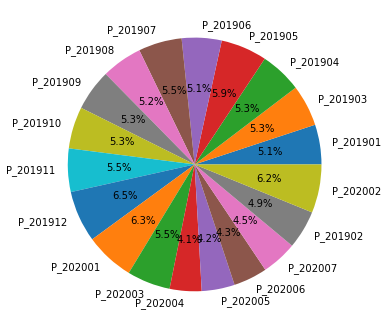

In [14]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(7, 7), dpi=60)
plt.pie([float(size[v]) for v in size], labels=[str(k) for k in size], autopct='%1.1f%%')

plt.show()

In [17]:
# datasets=[data['P_201901']['Id_Producto'],data['P_201904']['Id_Producto']]
periodos=[201901, 201902, 201903, 201904, 201905, 201906, 201907,201908, 201909, 201910, 201911, 201912,
          202001, 202002, 202003,202004, 202005, 202006, 202007]
def histograma(elemento='Id_Producto'):
    datasets=[dataset[elemento] for dataset in data.values()]
    plt.rcParams.update({'font.size': 80})
    plt.figure(figsize=(120, 50), dpi=10)
    plt.hist(datasets, label=periodos,align="mid")
    plt.title(f"Histograma {elemento} por periodo")
    plt.legend(loc='upper right')
    plt.show()

	 Producto


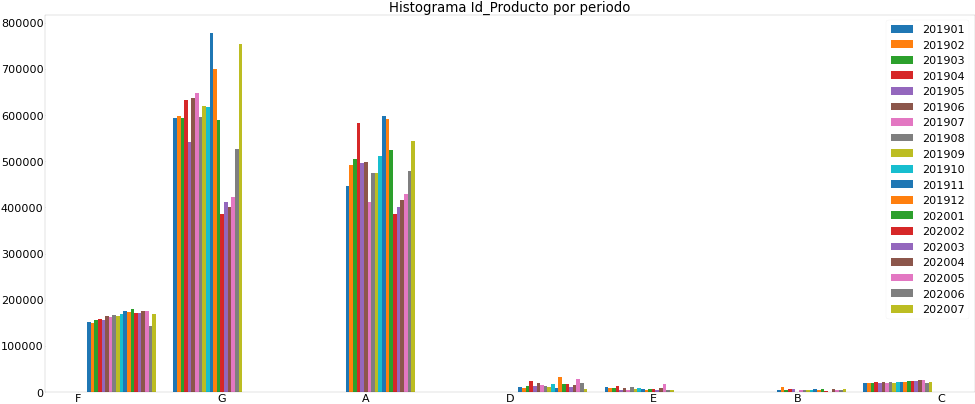

None

	 Signo


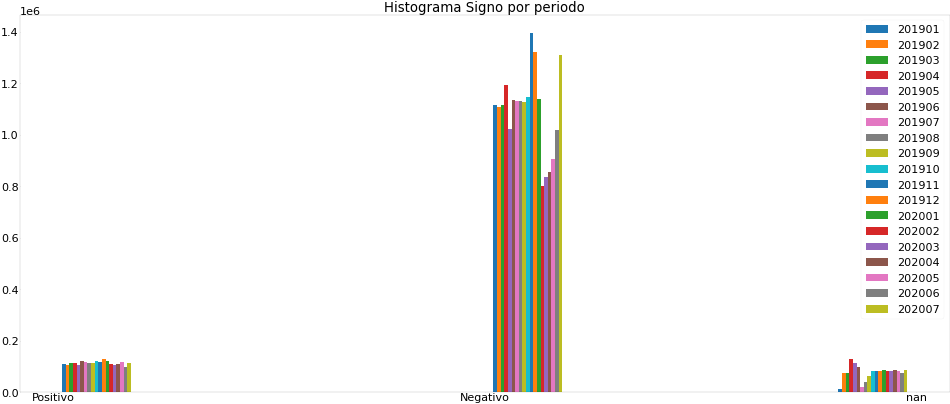

None

In [18]:
print(f'\t Producto')
display(histograma('Id_Producto'))
print(f'\t Signo')
display(histograma('Signo'))

In [26]:
def prepro(dataset):
    print( "\t Describe Montos")
    display(dataset['Monto'])
    print( "\t Describe Categoricas")
    objec = dataset.select_dtypes(include=['object'])
    display(objec.describe())

In [27]:
prepro(data['P_201906'][data['P_201906']["Signo"] == 'nan'])

	 Describe Montos


111         324672.00
113         324672.00
851        1101540.00
852        1101540.00
1269        221745.00
              ...    
24395479    157871.00
24396181    175323.00
24396545    156173.00
24397009    221799.00
24397343    142973.00
Name: Monto, Length: 112819, dtype: float64

	 Describe Categoricas


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Periodo
count,112819,112819,112819,112819,112819,112819
unique,60534,1,1,1,1,1
top,29272,A,G,A-G,nan,201906
freq,10,112819,112819,112819,112819,112819


	 Describe Montos


120        328813.00
860        188524.00
1284       208485.00
1287       327811.00
1798       191355.00
              ...   
24396190   134714.00
24396554   171325.00
24397017   191421.00
24397221   130260.00
24397350   194358.00
Name: Monto, Length: 83533, dtype: float64

	 Describe Categoricas


,id,Id_Producto,Tipo,Producto-Tipo,Signo,Periodo
count,83533,83533,83533,83533,83533,83533
unique,69783,1,1,1,1,1
top,13227,A,G,A-G,nan,202007
freq,8,83533,83533,83533,83533,83533


In [19]:
#Cantidad de Consumidores por periodo
cons={}
for i in data.keys():
    cons[i]=len(data[i]['id'].unique())
cons

{'P_201901': 66896,
 'P_201903': 68397,
 'P_201904': 69229,
 'P_201905': 70172,
 'P_201906': 70971,
 'P_201907': 72107,
 'P_201908': 72775,
 'P_201909': 73683,
 'P_201910': 74528,
 'P_201911': 75526,
 'P_201912': 76421,
 'P_202001': 77309,
 'P_202003': 78797,
 'P_202004': 79110,
 'P_202005': 79268,
 'P_202006': 79375,
 'P_202007': 79430,
 'P_201902': 67674,
 'P_202002': 78148}

In [ ]:
primer_quan, cuar_quan = df_Periodo201912.Monto.quantile([.25, .75])

hist_monto=df.loc[(df_Periodo201912.Monto > primer_quan) & (df_Periodo201912.Monto < cuar_quan)]

In [ ]:
df_1 = df[df['Periodo']==201901]

In [ ]:
df_1.head()

In [ ]:
count = df_1.groupby('Id_Producto')['Id_Producto'].count()
print(count)

In [ ]:
count/count.sum()

In [ ]:
df_1.describe()